# Le premier jet, il en faut un (work in progress)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [91]:
df = pd.read_csv('data/complete_db.csv', sep ='|')

In [92]:
df['author'].unique()

array(['Zola', 'Maupassant', 'Balzac'], dtype=object)

In [93]:
from nltk import word_tokenize, download
from re import split
from numpy import mean

download('punkt', quiet=True)

_punctuation = '.?!:;&()`"\'@°_-~'

def _getWordFeatures(tokens):

    tokensLengths = [len(t) for t in tokens]

    return mean(tokensLengths), max(tokensLengths)

def _buildSentencesFeatures(text):

    sentences = split(pattern='\\. |\\! |\\? ', string=text)
    sentencesLengths = [len(word_tokenize(s)) for s in sentences]

    return len(sentences), mean(sentencesLengths), max(sentencesLengths)

def _getWordsWithNumbersCount(tokens):
    return sum([any(c.isdigit() for c in t) for t in tokens])

def _getWordsWithPunctuationCount(tokens):
    return sum([any(c in _punctuation for c in t) for t in tokens])

def _getCommonWordsCount(tokens):
    return sum([t in _commonWords for t in tokens])

def _getCommonWordsAverageFrequency(tokens):
    return mean([_commonWords[t] if t in _commonWords else 0.0 for t in tokens])
                
                
def _analyze_single(text):

    features = {}

    # Sentences Features
    features['numberOfSentences'], features['meanSentenceLength'], features['maxSentenceLength'] = _buildSentencesFeatures(text)

    # Tokenize
    tokens = word_tokenize(text)
    percentage = int(100000 / len(tokens)) / 1000

    # Word based features
    features['wordCount'] = len(tokens)
    features['meanWordLength'], features['maxWordLength'] = _getWordFeatures(tokens)

    # Specific tokens based features
    features['wordsWithNumbersPercentage'] = _getWordsWithNumbersCount(tokens) * percentage
    features['wordsWithPunctuationPercentage'] = _getWordsWithPunctuationCount(tokens) * percentage

    # Overall frequency based features, but only if we want to use the common french words (le, la, il etc.)
    '''
    if commonWords is not None:
        features['commonWordsPercentage'] = getCommonWordsCount(tokens) * percentage
        features['commonWordsMeanFrequency'] = getCommonWordsAverageFrequency(tokens) * percentage
    '''
    del tokens

    return features

tryyy = df['paragraph'].apply(lambda x : _analyze_single(x))

In [94]:
#dégueu mais pas le time

l_nof = []
l_wordcount = []
l_meanWordLength = []
l_maxWordLength = []
l_wordsWithNumbersPercentage = []
l_wordsWithPunctuationPercentage = []

for i in range (len(tryyy)):
    
    l_nof.append(tryyy[i]['numberOfSentences'])
    l_meanWordLength.append(tryyy[i]['meanWordLength'])
    l_maxWordLength.append(tryyy[i]['maxWordLength'])
    l_wordsWithNumbersPercentage.append(tryyy[i]['wordsWithNumbersPercentage'])
    l_wordsWithPunctuationPercentage.append(tryyy[i]['wordsWithPunctuationPercentage'])
    l_wordcount.append(tryyy[i]['wordCount'])

my_df = pd.read_csv('data/complete_db.csv', sep ='|')

my_df['numberOfSentences'] = l_nof
my_df['wordCount'] = l_wordcount
my_df['meanWordLength'] = l_meanWordLength
my_df['maxWordLength'] = l_maxWordLength
my_df['wordsWithNumbersPercentage'] = l_wordsWithNumbersPercentage
my_df['wordsWithPunctuationPercentage'] = l_wordsWithPunctuationPercentage

my_df.head()

,paragraph,author,numberOfSentences,wordCount,meanWordLength,maxWordLength,wordsWithNumbersPercentage,wordsWithPunctuationPercentage
0,"Alors, il pâlit, un désespoir lui emplit les y...",Zola,3,48,4.708333,14,0.000,16.664
1,"Le lendemain, heureusement, Jeanlin lui apport...",Zola,3,49,4.346939,12,2.040,8.160
2,"--Monsieur le directeur, c'est justement parce...",Zola,3,88,4.147727,10,0.000,13.632
3,Cet ordre de son père ralentit un instant sa c...,Zola,4,43,3.930233,10,0.000,9.300
4,"--Nous levions la main comme ça, nous jurions ...",Zola,4,25,3.360000,11,0.000,28.000
5,"Mais ils s'arrêtèrent, pour regarder Zacharie ...",Zola,9,247,4.174089,14,0.000,8.080
6,--Salaud! cochon! espèce de mufle!... Attends...,Zola,4,29,3.413793,9,0.000,24.136
7,"--J'étais donc venue, avoua-t-elle enfin, pour...",Zola,2,31,4.258065,12,0.000,22.575
8,"D'abord, la bande des mineurs descendue du cor...",Zola,2,30,4.400000,12,0.000,9.999
9,"Étienne, rudement, se heurta la tête. Sans la...",Zola,9,200,4.235000,13,0.000,8.000


In [95]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
paragraph                         600 non-null object
author                            600 non-null object
numberOfSentences                 600 non-null int64
wordCount                         600 non-null int64
meanWordLength                    600 non-null float64
maxWordLength                     600 non-null int64
wordsWithNumbersPercentage        600 non-null float64
wordsWithPunctuationPercentage    600 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 37.6+ KB


In [96]:
my_df.describe()

,numberOfSentences,wordCount,meanWordLength,maxWordLength,wordsWithNumbersPercentage,wordsWithPunctuationPercentage
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,4.596667,97.466667,4.096488,11.630000,0.027032,14.037957
std,6.488772,166.033433,0.433483,2.219905,0.212371,6.334903
min,1.000000,15.000000,2.534884,6.000000,0.000000,2.738000
25%,2.000000,31.000000,3.820617,10.000000,0.000000,9.668250
50%,3.000000,48.000000,4.077935,11.000000,0.000000,12.540000
75%,5.000000,91.250000,4.365320,13.000000,0.000000,17.156500
max,84.000000,1727.000000,6.200000,22.000000,2.439000,42.306000


Wordcount : mean 97 et std 166 oov

wordsWithNumbersPercentage is dumb

# Starting plots

**Plot général pour voir d'éventuelles corrélations entre variables et/ou des tendances parmi les auteurs**

In [97]:
fig = px.scatter_matrix(my_df,
    dimensions=["numberOfSentences", "wordCount", "meanWordLength", "maxWordLength", "wordsWithPunctuationPercentage"],
    color="author")
fig.update_traces(diagonal_visible=False)
fig.show()

### Comparaison du WordCount pour chaque auteur

In [98]:
import plotly.figure_factory as ff

group_labels = ['Zola', 'Maupassant', 'Balzac']

x1 = my_df[my_df['author'] == 'Zola']['wordCount']
x2 = my_df[my_df['author'] == 'Maupassant']['wordCount']
x3 = my_df[my_df['author'] == 'Balzac']['wordCount']

x2 = x2.reset_index(drop=True)
x3 = x3.reset_index(drop=True)

hist_data = [x1,x2,x3]

fig = ff.create_distplot(hist_data, group_labels, bin_size=1)
fig.show()

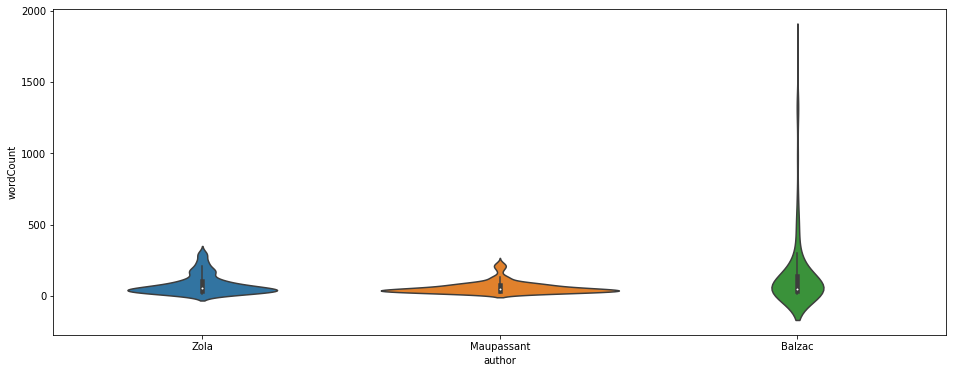

In [99]:
plt.figure(figsize=(16, 6))

sns.violinplot(x='author', y='wordCount', data=my_df, order=["Zola", "Maupassant", "Balzac"])

In [100]:
import plotly.graph_objects as go

In [101]:
fig = go.Figure()

authors = ['Zola', 'Maupassant', 'Balzac']

for author in authors:
    fig.add_trace(go.Violin(x=my_df['author'][my_df['author'] == author],
                            y=my_df['wordCount'][my_df['author'] == author],
                            name=author,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

Marrant, le plot de Balzac forme une plume de stylo. En tout cas il écrivait des longues phrases le bougre.

### Words Count vs number of sentences in a Paragraph

In [102]:
import plotly.express as px

fig = px.scatter(my_df, x="wordCount", y="numberOfSentences", color="author",
                 size='meanWordLength', hover_data=['wordsWithPunctuationPercentage'])
fig.show()

On peut isoler les écrivains dans le plot.

Balzac se différencie des autres, on voit quasisment que lui sur le graphe de base --> erreur dans les données ou est ce qu'il écrivait juste des pavés tout le temps ?

On enlevant Balzac on peut voir une nette différence entre zola et maupassant : les points appartenants à Zola sont plus étirés la ou ceux de Maupaussant forment un bon bloc avec des eparpillements.

**Ce graphe pourrait montrer une différence dans style d'écriture : Zola écrirait-il en général des phrases avec plus de mots ?**

### Words with punctation vs number of sentences in a Paragraph

#### Quelle est la relation entre le taux de ponctuation, et le nombre de mots chez les auteurs ?

Plus on écritait une phrase longue, et plus on devrait utiliser de la ponctuation comme des virgules, point virgules, non ?

D'un autre côté, ça serait intéressant de voir si des auteurs utilisent fortement la ponctuation alors qu'ils utilisent peu de mots.

In [103]:
fig = px.scatter(my_df, x="wordCount", y="wordsWithPunctuationPercentage", color="author",)
fig.show()

On voit que même quand Balzac utilise peu de mots dans ses paragraphes, il existe une bonne diversité concernant la ponctuation.

In [104]:
fig = px.scatter(my_df, x="wordsWithPunctuationPercentage", y="wordCount", color="author",)
fig.show()

In [105]:
fig = px.scatter(my_df, x="wordsWithPunctuationPercentage", y="numberOfSentences", color="author",)
fig.show()

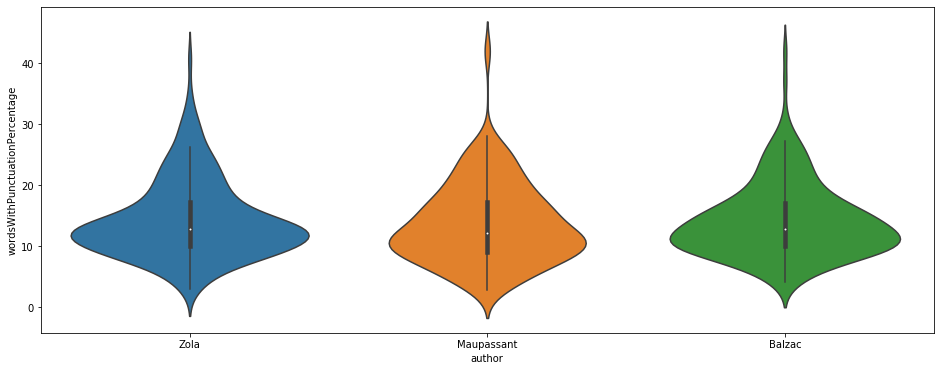

In [106]:
plt.figure(figsize=(16, 6))

sns.violinplot(x='author', y='wordsWithPunctuationPercentage', data=my_df, order=["Zola", "Maupassant", "Balzac"])

In [107]:
fig = go.Figure()

authors = ['Zola', 'Maupassant', 'Balzac']

for author in authors:
    fig.add_trace(go.Violin(x=my_df['author'][my_df['author'] == author],
                            y=my_df['wordsWithPunctuationPercentage'][my_df['author'] == author],
                            name=author,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

Deja beaucoup plus équilibré que pour le word count !